In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
import numpy as np
from sklearn.metrics import mean_absolute_error

Importing plotly failed. Interactive plots will not work.


In [2]:
forecasting_df = pd.read_csv('incoming_packages.csv')

**Analysera datan**

In [3]:
forecasting_df.head()

,date,total_packages,cooled_packages,fire_packages,normal_packages
0,2020-01-01,1745,370,488,887
1,2020-01-02,1847,308,402,1137
2,2020-01-03,1842,314,394,1134
3,2020-01-04,664,131,181,352
4,2020-01-05,871,137,190,544


In [4]:
forecasting_df.isnull()

,date,total_packages,cooled_packages,fire_packages,normal_packages
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
846,False,False,False,False,False
847,False,False,False,False,False
848,False,False,False,False,False
849,False,False,False,False,False


In [5]:
forecasting_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
846    False
847    False
848    False
849    False
850    False
Length: 851, dtype: bool

In [6]:
forecasting_df = forecasting_df [["date", "total_packages"]]

In [7]:
forecasting_df.head()

,date,total_packages
0,2020-01-01,1745
1,2020-01-02,1847
2,2020-01-03,1842
3,2020-01-04,664
4,2020-01-05,871


In [8]:
forecasting_df["moving_10"] = forecasting_df["total_packages"]. rolling(10).mean()

In [9]:
forecasting_df.head(20)

,date,total_packages,moving_10
0,2020-01-01,1745,NaN
1,2020-01-02,1847,NaN
2,2020-01-03,1842,NaN
3,2020-01-04,664,NaN
4,2020-01-05,871,NaN
5,2020-01-06,1744,NaN
6,2020-01-07,1848,NaN
7,2020-01-08,1711,NaN
8,2020-01-09,1767,NaN
9,2020-01-10,1717,1575.6


In [10]:
forecasting_df.shape

(851, 3)

In [11]:
forecasting_df["moving_20"] = forecasting_df["total_packages"]. rolling(20).mean()

In [12]:
forecasting_df["moving_50"] = forecasting_df["total_packages"]. rolling(50).mean()

In [13]:
forecasting_df["moving_100"] = forecasting_df["total_packages"]. rolling(100).mean()

([<matplotlib.axis.XTick at 0x2018de22800>,
 [Text(0.0, 0, '2020-01-01'),
  Text(182.0, 0, '2020-07-01'),
  Text(366.0, 0, '2021-01-01'),
  Text(547.0, 0, '2021-07-01'),
  Text(731.0, 0, '2022-01-01'),
  Text(851.0, 0, '2022-07-01')])

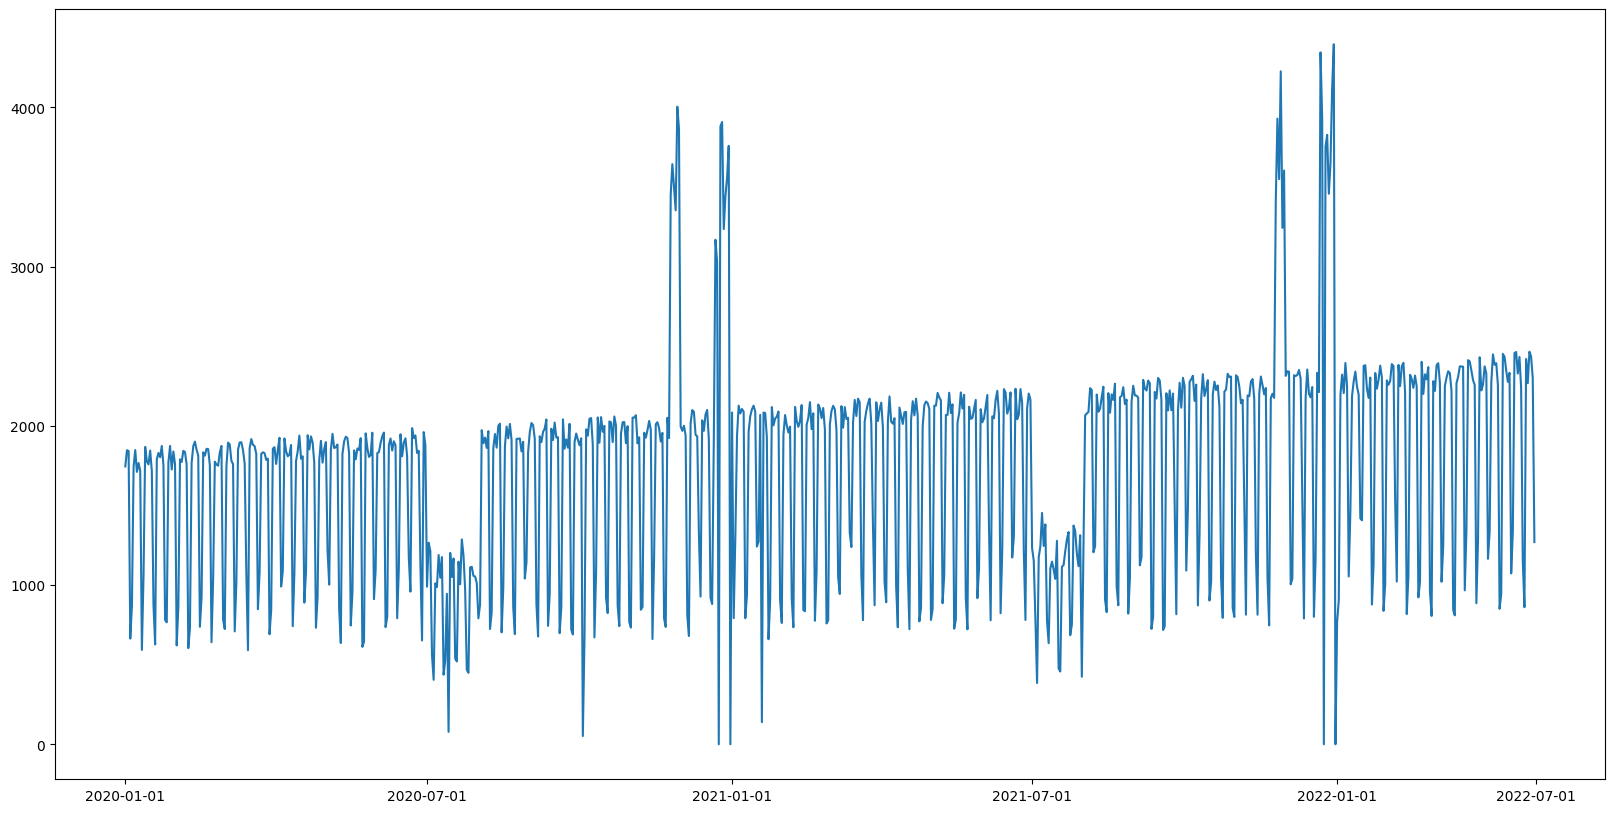

In [14]:
plt.plot(forecasting_df['date'], forecasting_df['total_packages'])
plt.xticks(['2020-01-01','2020-07-01','2021-01-01','2021-07-01','2022-01-01','2022-07-01'])

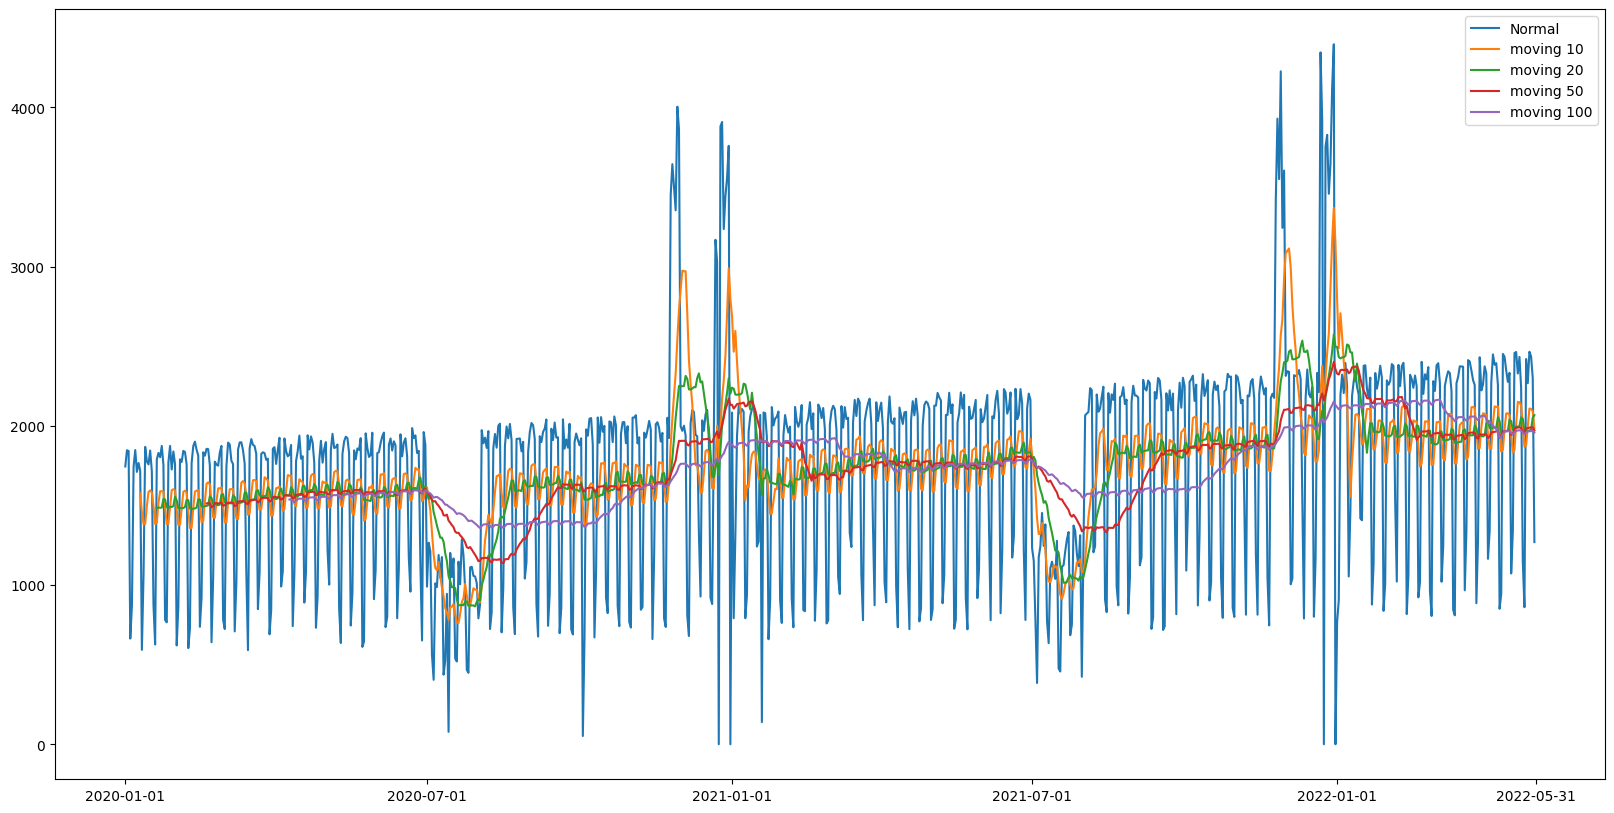

In [15]:
plt.plot(forecasting_df['date'], forecasting_df['total_packages'], label= "Normal")
plt.plot(forecasting_df['date'], forecasting_df['moving_10'], label = "moving 10")
plt.plot(forecasting_df['date'], forecasting_df['moving_20'], label = "moving 20")
plt.plot(forecasting_df['date'], forecasting_df['moving_50'], label = "moving 50")
plt.plot(forecasting_df['date'], forecasting_df['moving_100'], label = "moving 100")
plt.xticks([
    "2020-01-01",
    "2020-07-01",
    "2021-01-01",
    "2021-07-01",
    "2022-01-01",
    "2022-05-31"
])
plt.legend(loc= "upper right")
plt.show()

In [16]:
forecasting_copy = forecasting_df.copy()

In [17]:
forecasting_df2 = forecasting_df.copy()

*Finns det någon säsongvariation? I så fall, vilka?*
svar. Det finns tydliga säsongvariationer. I bilden ovanför, ser man att under juli månad skeppas det inte lika många packet som det gör i vanliga fall, medan i slutet av november och början av december skeppas det mycket mer.

In [18]:
forecasting_copy = forecasting_copy[forecasting_copy["date"] >= '2021-11-01'][ forecasting_copy["date"] <= '2021-12-31']

C:\Users\nille\AppData\Local\Temp\ipykernel_11116\3236971691.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  forecasting_copy = forecasting_copy[forecasting_copy["date"] >= '2021-11-01'][ forecasting_copy["date"] <= '2021-12-31']


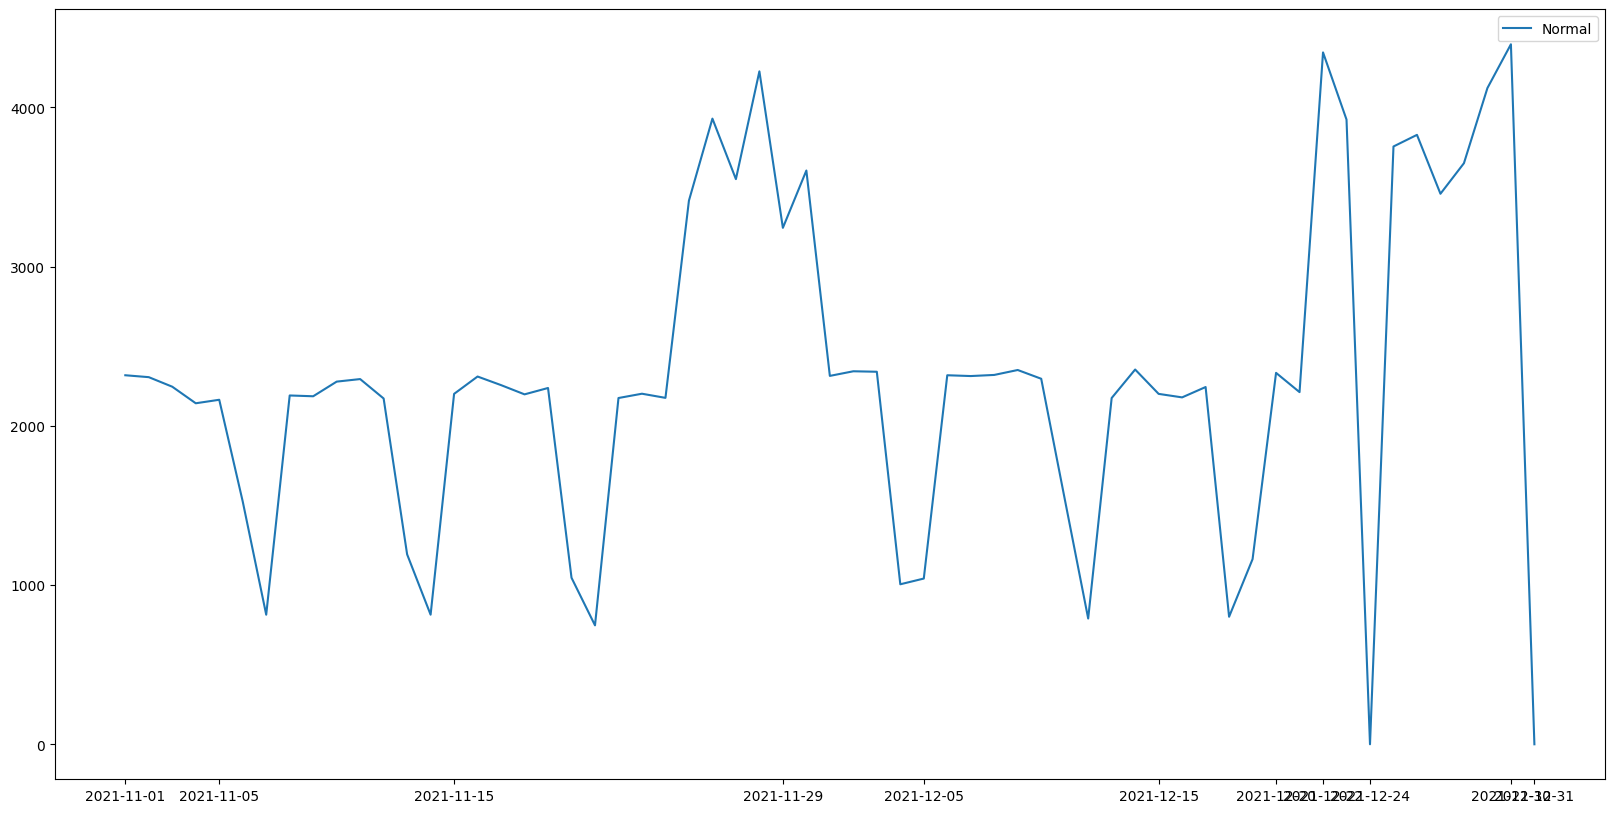

In [19]:
plt.plot(forecasting_copy['date'], forecasting_copy['total_packages'], label= "Normal")
plt.xticks([
    "2021-11-01",
    "2021-11-05",
    "2021-11-15",
    "2021-11-29",
    "2021-12-05",
    "2021-12-15",
    "2021-12-20",
    "2021-12-22",
    "2021-12-24",
    "2021-12-30",
    "2021-12-31"
])
plt.legend(loc= "upper right")
plt.show()

*det finns spikar i november och december, vad kan det bero på?*
svar: Anleding till spikarna i december är bland annat black friday som inträffar i slutet av november, julhandlen och mellandagreorna. Det är de dagarna då mest varor skeppas ut ifrån lagret till deras slut destination. 

In [20]:
forecasting_copy = forecasting_copy[forecasting_copy["date"] >= '2021-11-01'][ forecasting_copy["date"] <= '2021-12-31']

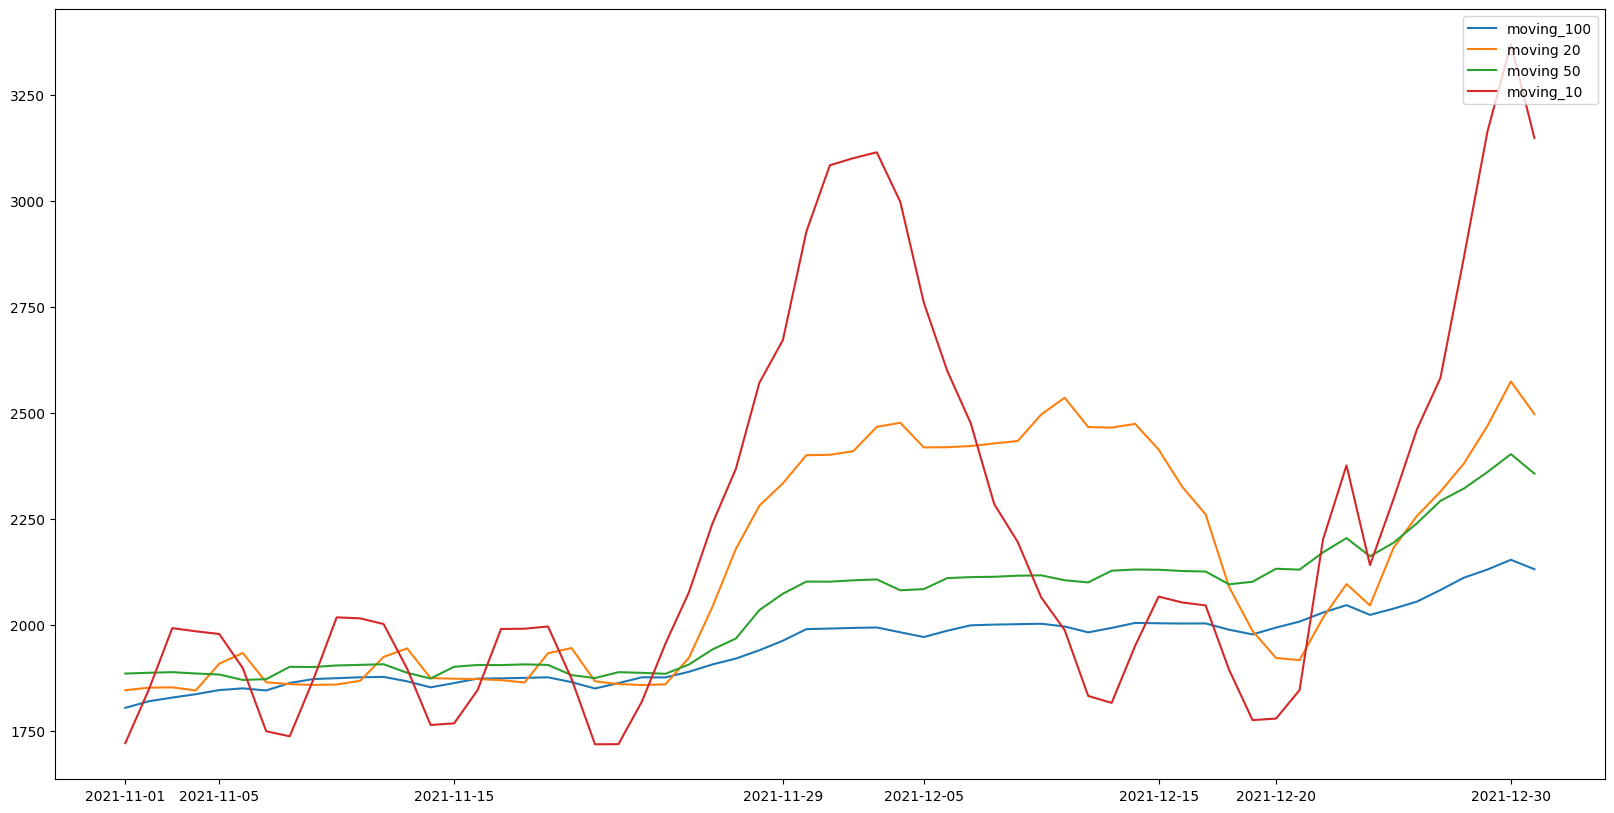

In [21]:
plt.plot(forecasting_copy['date'], forecasting_copy['moving_100'], label= "moving_100")
plt.plot(forecasting_copy['date'], forecasting_copy['moving_20'], label = "moving 20")
plt.plot(forecasting_copy['date'], forecasting_copy['moving_50'], label = "moving 50")
plt.plot(forecasting_copy['date'], forecasting_copy['moving_10'], label= "moving_10")
plt.xticks([
    "2021-11-01",
    "2021-11-05",
    "2021-11-15",
    "2021-11-29",
    "2021-12-05",
    "2021-12-15",
    "2021-12-20",
    "2021-12-30"
])
plt.legend(loc= "upper right")
plt.show()

In [22]:
forecasting_df2 = forecasting_df2[forecasting_df2["date"] >= '2021-01-01'][ forecasting_df2["date"] <= '2021-12-31']

C:\Users\nille\AppData\Local\Temp\ipykernel_11116\3168651169.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  forecasting_df2 = forecasting_df2[forecasting_df2["date"] >= '2021-01-01'][ forecasting_df2["date"] <= '2021-12-31']


In [23]:
forecasting_df2.head()

,date,total_packages,moving_10,moving_20,moving_50,moving_100
366,2021-01-01,2084,2689.9,2240.05,2132.34,1881.38
367,2021-01-02,792,2466.1,2233.25,2108.66,1870.67
368,2021-01-03,1310,2597.1,2197.00,2121.64,1863.64
369,2021-01-04,1937,2402.7,2195.40,2136.80,1875.80
370,2021-01-05,2127,2224.5,2198.20,2139.14,1890.17


[]
           date  total_packages  moving_10  moving_20  moving_50  moving_100
366  2021-01-01            2084     2689.9    2240.05    2132.34     1881.38
367  2021-01-02             792     2466.1    2233.25    2108.66     1870.67
368  2021-01-03            1310     2597.1    2197.00    2121.64     1863.64
369  2021-01-04            1937     2402.7    2195.40    2136.80     1875.80
370  2021-01-05            2127     2224.5    2198.20    2139.14     1890.17
..          ...             ...        ...        ...        ...         ...
726  2021-12-27            3458     2582.0    2313.60    2291.86     2081.54
727  2021-12-28            3650     2866.9    2380.10    2321.04     2110.63
728  2021-12-29            4122     3162.8    2468.65    2359.76     2129.80
729  2021-12-30            4397     3369.2    2573.70    2402.14     2152.80
730  2021-12-31               0     3148.0    2496.60    2356.26     2130.57

[365 rows x 6 columns]


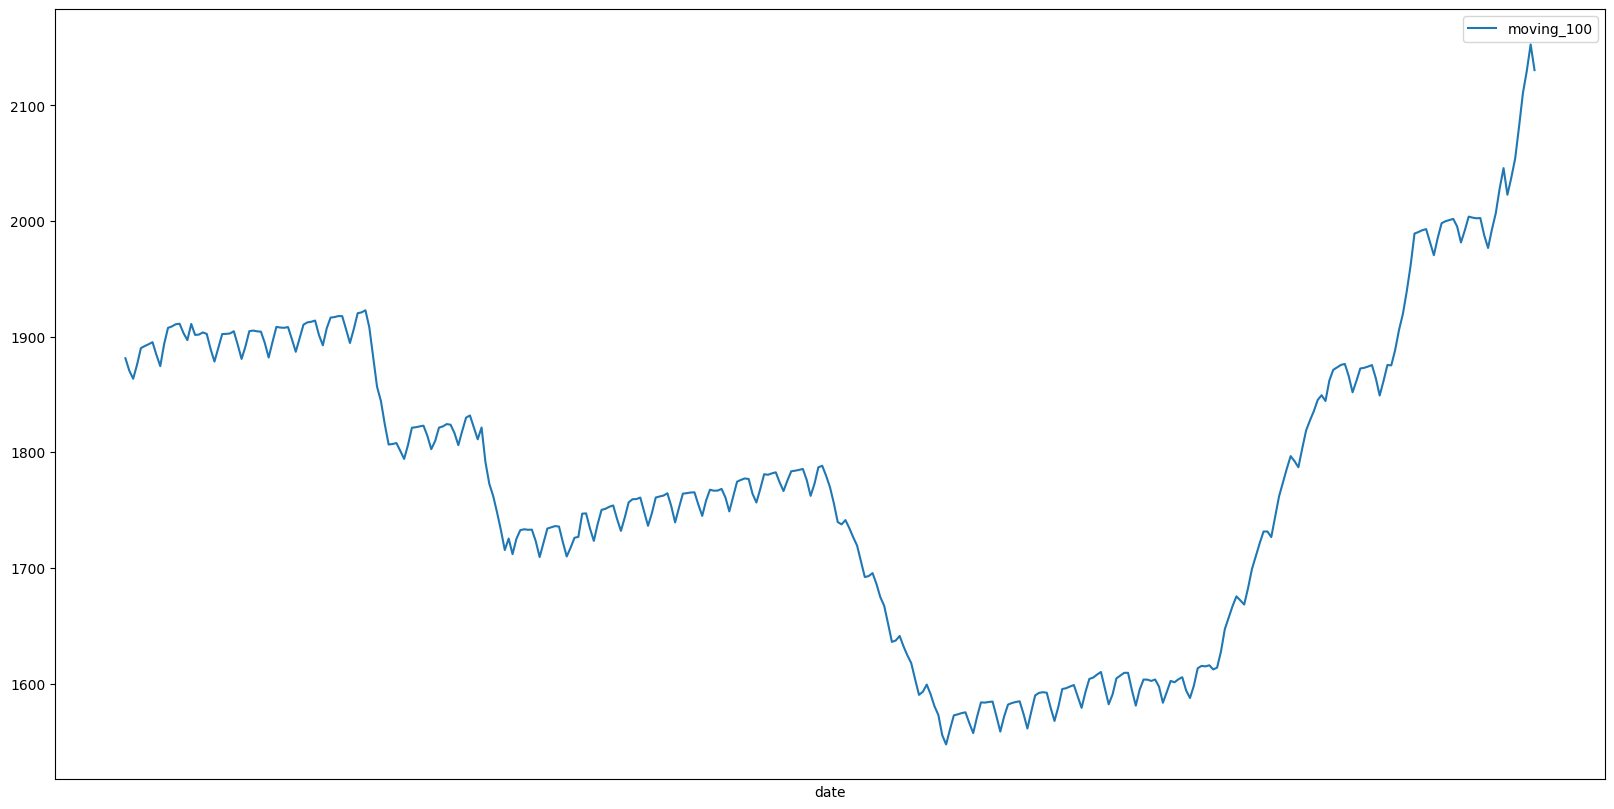

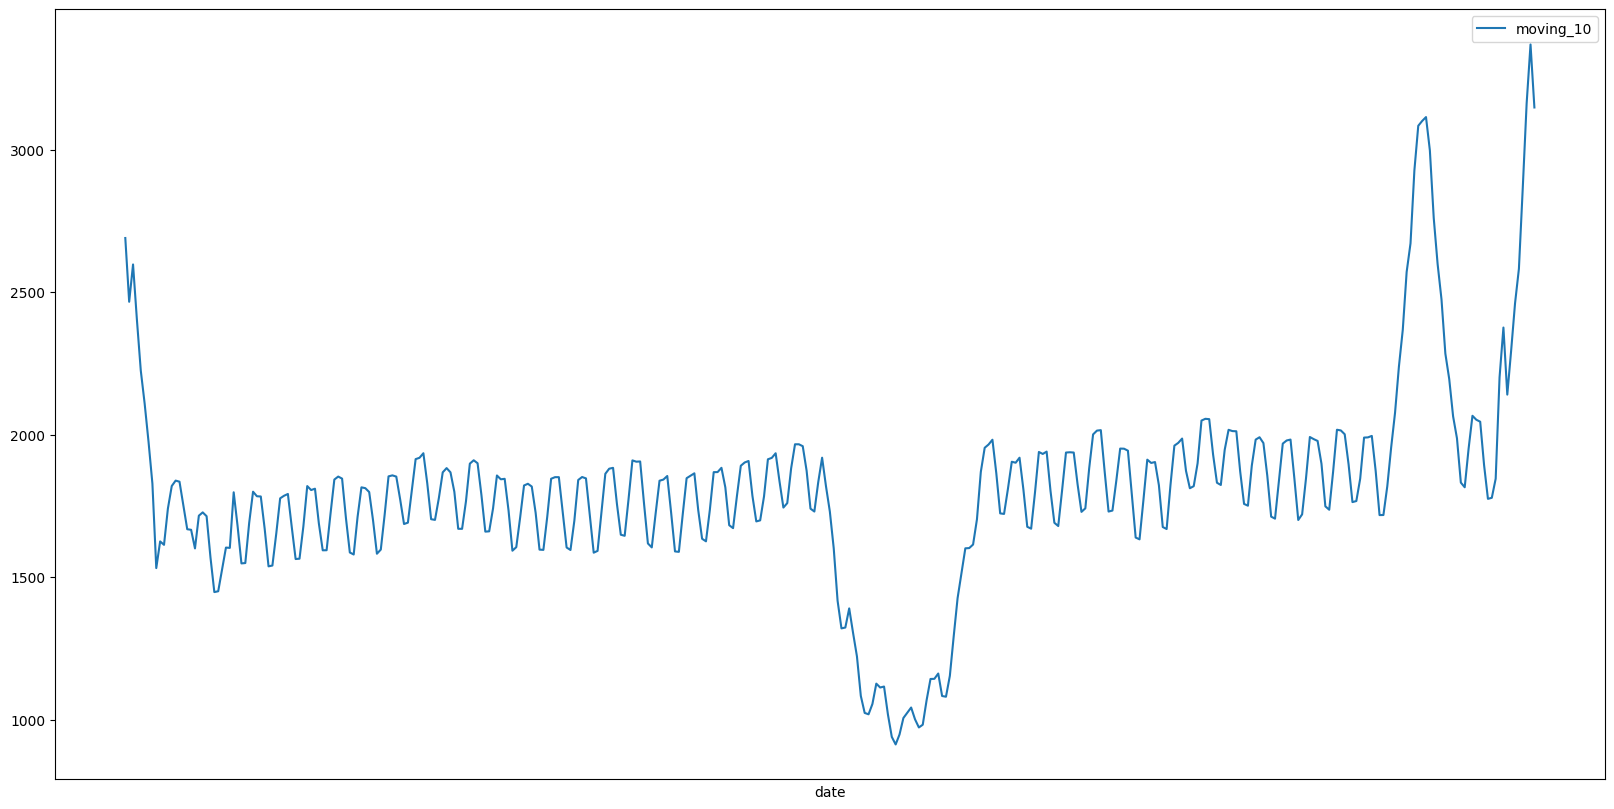

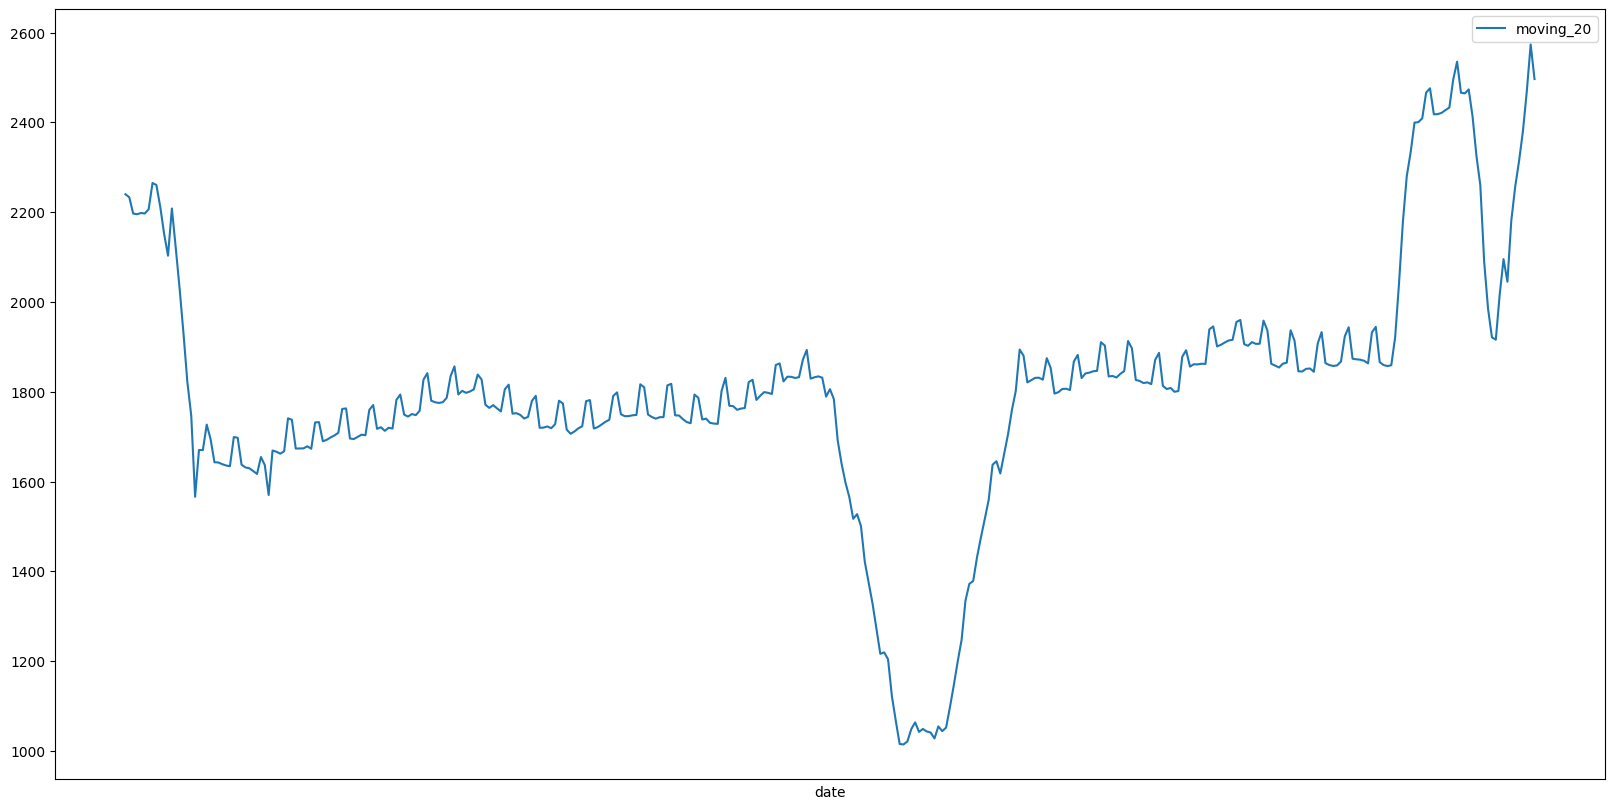

In [24]:
series = forecasting_df2["date"]

xt = np.arange(series.index.min(), series.index.max())
xt = xt[xt%1000==0]
print(xt)
fig = forecasting_df2.plot(x="date", y="moving_100", xticks=xt)
fig = forecasting_df2.plot(x="date", y="moving_10", xticks=xt)
fig = forecasting_df2.plot(x="date", y="moving_20", xticks=xt)
print(forecasting_df2)

*finns det någon trend?*
svar: Det finns trender och de går uppåt under ett år. Jag använder mig av moving_10/100 och 20 för att där, är det tydligare att se om det är en trend eller inte. 

*finns det några dagar med extremvärden?*
svar: Ja, det finns dgar med extremvärden. Om vi tittar på november och december 2021 som ett exempel, så är extremdagarna 29/11,22/12, 24/12, 30/12 och 31/12. 24/12 och 31/12 är julafton och nyårsafton, de dagarna som det skeppas minst varor. Åt andra sidan, 29/11, 22/12 och 30/12 är de dagnar som det skeppas mest. 

In [25]:
train_data = forecasting_df.copy()

In [26]:
test_data = forecasting_df.copy()

In [27]:
train_data.shape

(851, 6)

In [28]:
test_data.shape

(851, 6)

**Träna en facebook prophet modell**

*Träna modellen på all data före 2022-04-01*

In [29]:
train_data.rename(columns={"date": "ds", "total_packages": "y"}, inplace=True)

In [30]:
train_data.head()

,ds,y,moving_10,moving_20,moving_50,moving_100
0,2020-01-01,1745,NaN,NaN,NaN,NaN
1,2020-01-02,1847,NaN,NaN,NaN,NaN
2,2020-01-03,1842,NaN,NaN,NaN,NaN
3,2020-01-04,664,NaN,NaN,NaN,NaN
4,2020-01-05,871,NaN,NaN,NaN,NaN


In [31]:
model = Prophet()

In [32]:
model.fit(train_data)

15:48:07 - cmdstanpy - INFO - Chain [1] start processing
15:48:07 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
Forecast = model.predict(train_data)

In [34]:
Forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,1474.173396,1748.357903,2767.996239,1474.173396,1474.173396,761.250699,761.250699,761.250699,337.365227,337.365227,337.365227,423.885472,423.885472,423.885472,0.0,0.0,0.0,2235.424095
1,2020-01-02,1474.796016,1632.648115,2689.684702,1474.796016,1474.796016,692.958788,692.958788,692.958788,285.298466,285.298466,285.298466,407.660323,407.660323,407.660323,0.0,0.0,0.0,2167.754805
2,2020-01-03,1475.418637,1603.874395,2616.232617,1475.418637,1475.418637,642.294563,642.294563,642.294563,254.980208,254.980208,254.980208,387.314355,387.314355,387.314355,0.0,0.0,0.0,2117.713200
3,2020-01-04,1476.041257,568.367679,1552.118922,1476.041257,1476.041257,-391.903305,-391.903305,-391.903305,-754.985854,-754.985854,-754.985854,363.082549,363.082549,363.082549,0.0,0.0,0.0,1084.137952
4,2020-01-05,1476.663877,607.945370,1578.116981,1476.663877,1476.663877,-390.998271,-390.998271,-390.998271,-726.300300,-726.300300,-726.300300,335.302029,335.302029,335.302029,0.0,0.0,0.0,1085.665606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,2022-04-26,1992.645655,1816.903315,2809.634546,1992.645655,1992.645655,318.436675,318.436675,318.436675,291.380266,291.380266,291.380266,27.056408,27.056408,27.056408,0.0,0.0,0.0,2311.082330
847,2022-04-27,1993.257035,1863.360997,2845.641441,1993.257035,1993.257035,358.563324,358.563324,358.563324,337.365227,337.365227,337.365227,21.198097,21.198097,21.198097,0.0,0.0,0.0,2351.820359
848,2022-04-28,1993.868415,1810.673333,2825.108869,1993.868415,1993.868415,300.480571,300.480571,300.480571,285.298466,285.298466,285.298466,15.182106,15.182106,15.182106,0.0,0.0,0.0,2294.348987
849,2022-04-29,1994.479795,1766.269245,2725.534394,1994.479795,1994.479795,264.185429,264.185429,264.185429,254.980208,254.980208,254.980208,9.205221,9.205221,9.205221,0.0,0.0,0.0,2258.665224


In [35]:
train_data = train_data[train_data["ds"] <= '2022-04-01']

In [36]:
train_data.tail()

,ds,y,moving_10,moving_20,moving_50,moving_100
817,2022-03-28,2431,1861.8,1943.05,1948.64,2052.67
818,2022-03-29,2223,1987.4,1937.05,1945.44,2063.27
819,2022-03-30,2260,2079.3,1933.50,1945.64,2062.54
820,2022-03-31,2374,2075.4,1941.20,1945.62,2064.16
821,2022-04-01,2329,2067.9,2015.45,1944.28,2043.99


In [37]:
train_data.shape

(822, 6)

In [38]:
Forecast = model.predict(train_data)

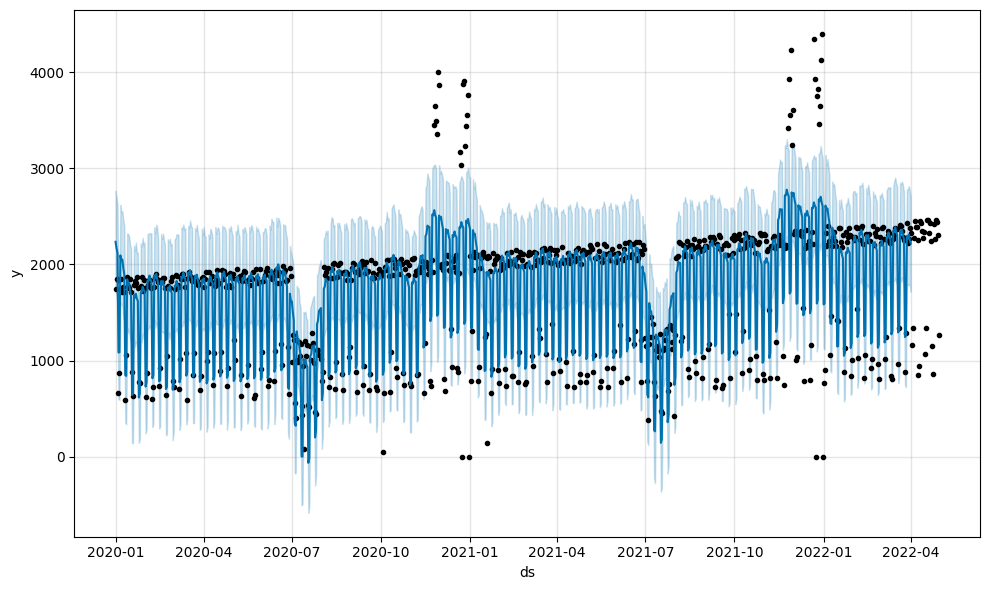

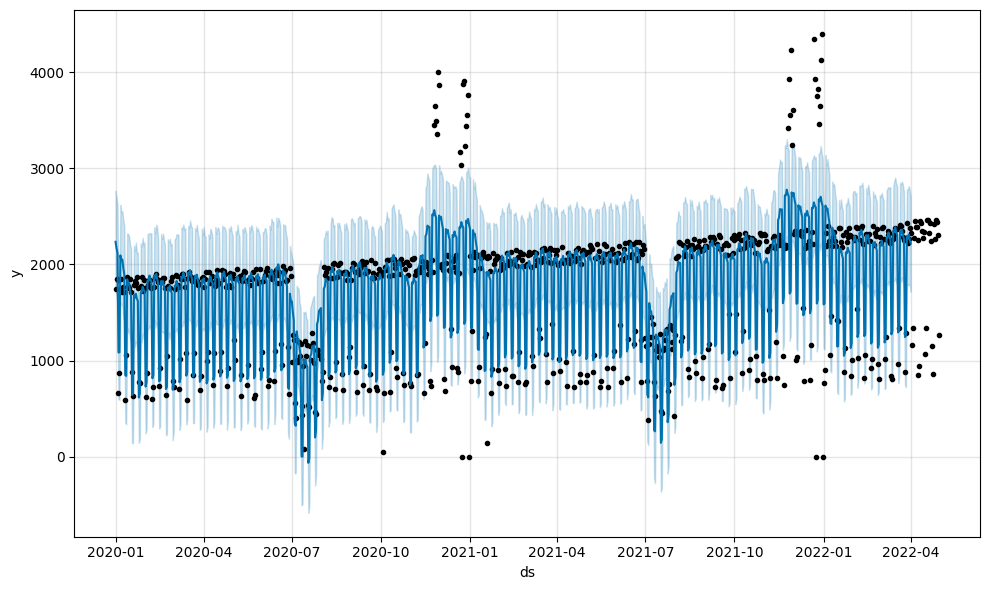

In [39]:
model.plot(Forecast)

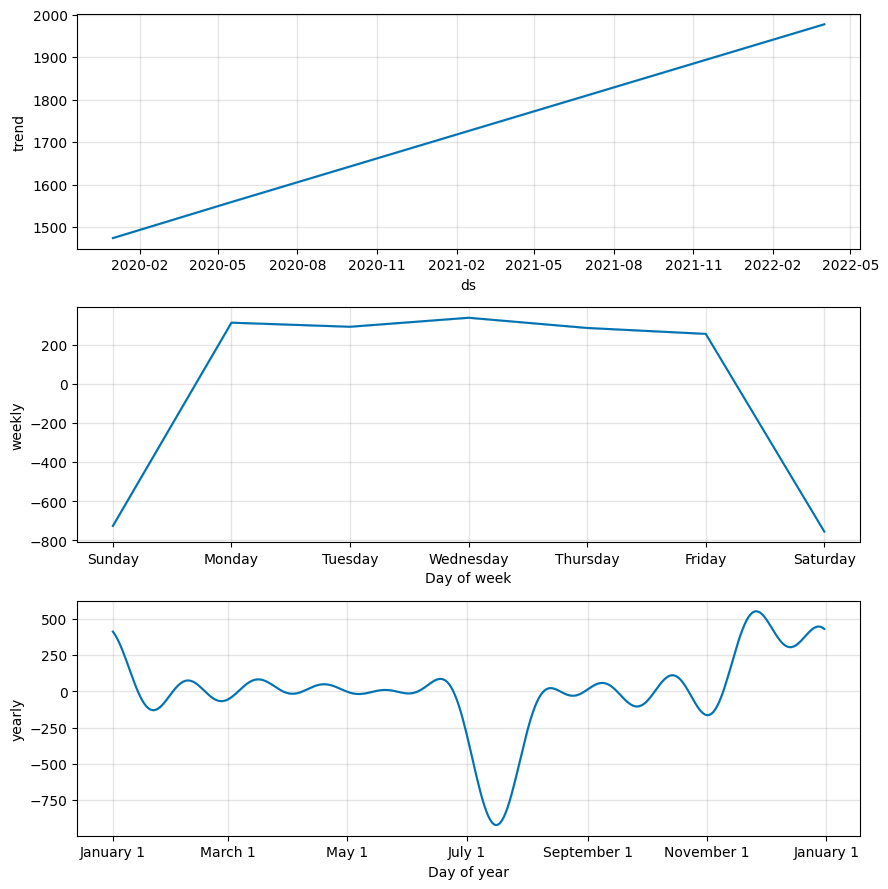

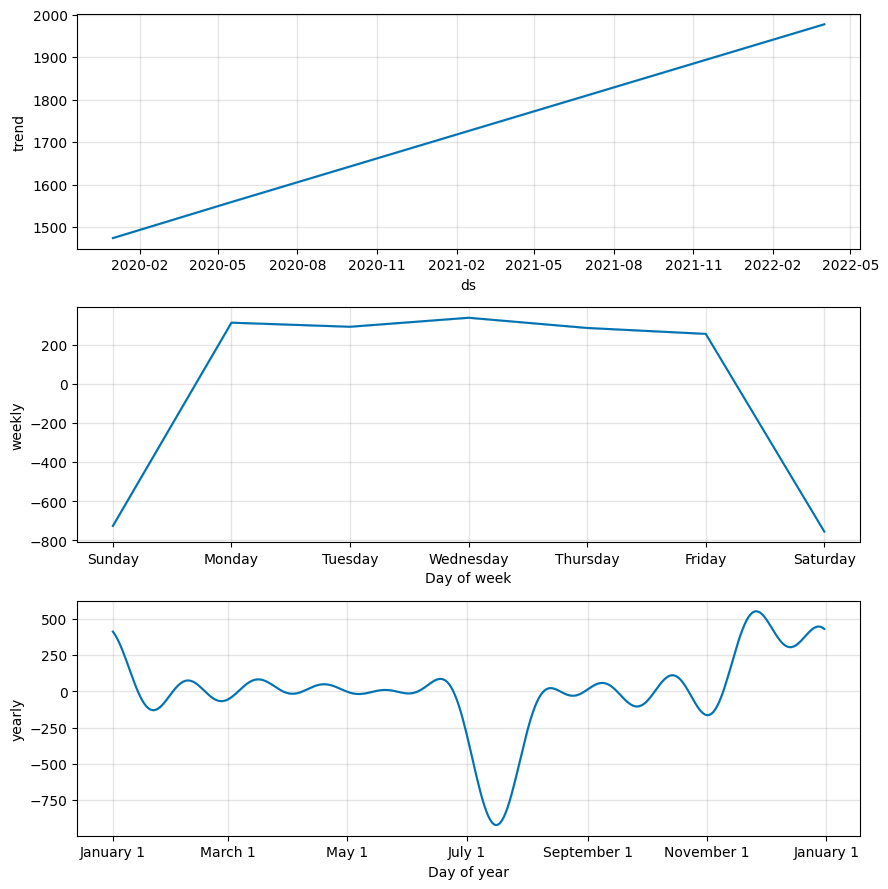

In [40]:
model.plot_components(Forecast)

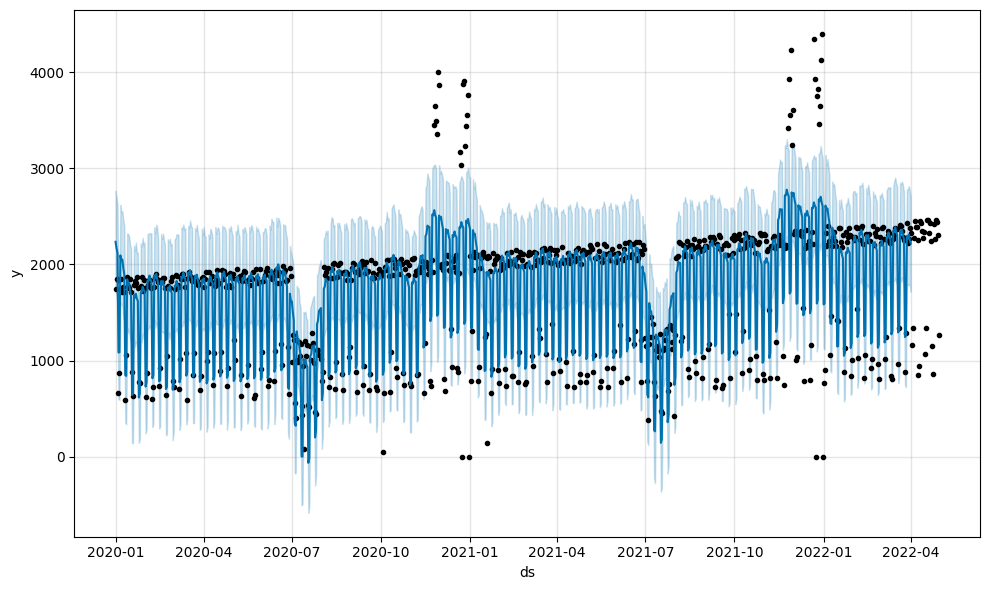

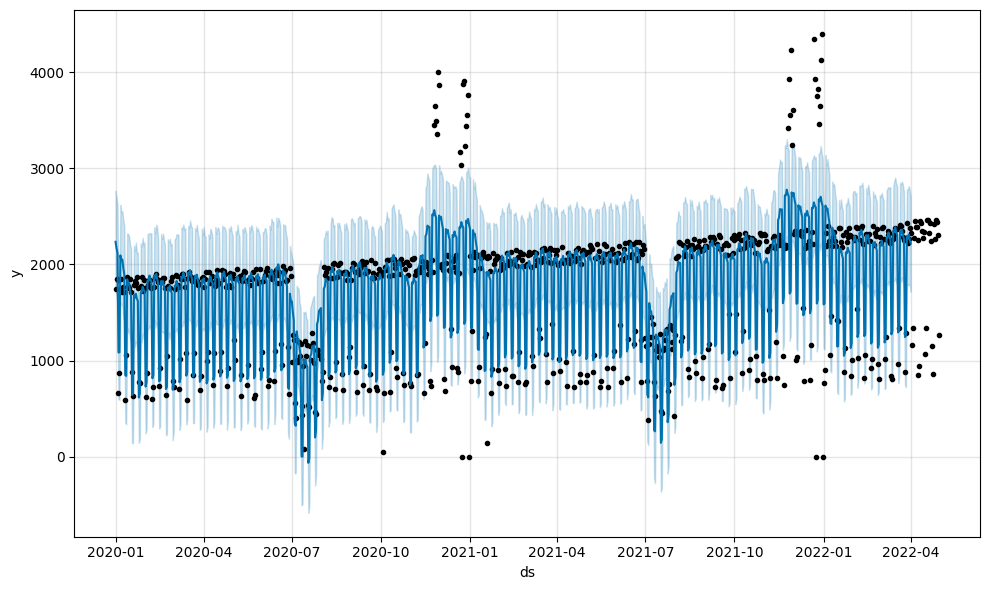

In [41]:
model.plot(Forecast)

*Test modellen på alla data från 2022-04-01 och framåt*

In [42]:
test_data.rename(columns={"date": "ds", "total_packages": "y"}, inplace=True)

In [43]:
test_data.head()

,ds,y,moving_10,moving_20,moving_50,moving_100
0,2020-01-01,1745,NaN,NaN,NaN,NaN
1,2020-01-02,1847,NaN,NaN,NaN,NaN
2,2020-01-03,1842,NaN,NaN,NaN,NaN
3,2020-01-04,664,NaN,NaN,NaN,NaN
4,2020-01-05,871,NaN,NaN,NaN,NaN


In [44]:
test_model = Prophet()

In [45]:
test_model.fit(test_data)

15:48:10 - cmdstanpy - INFO - Chain [1] start processing
15:48:10 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
test_data = test_data[test_data["ds"] >= '2022-04-01']

In [47]:
test_data.head()

,ds,y,moving_10,moving_20,moving_50,moving_100
821,2022-04-01,2329,2067.9,2015.45,1944.28,2043.99
822,2022-04-02,1165,1949.6,2033.20,1923.36,2016.40
823,2022-04-03,1337,1854.6,1986.65,1933.74,2029.77
824,2022-04-04,2272,1856.1,1984.85,1958.02,2014.94
825,2022-04-05,2449,2012.4,1988.60,1960.58,2001.15


In [48]:
test_forecast = test_model.predict(test_data)

In [49]:
test_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-04-01,1977.361153,1685.919357,2717.146016,1977.361153,1977.361153,241.741023,241.741023,241.741023,254.980208,254.980208,254.980208,-13.239185,-13.239185,-13.239185,0.0,0.0,0.0,2219.102176
1,2022-04-02,1977.972533,713.996787,1722.912120,1977.972533,1977.972533,-770.538675,-770.538675,-770.538675,-754.985854,-754.985854,-754.985854,-15.552821,-15.552821,-15.552821,0.0,0.0,0.0,1207.433858
2,2022-04-03,1978.583913,741.790466,1723.485845,1978.583913,1978.583913,-742.765665,-742.765665,-742.765665,-726.300300,-726.300300,-726.300300,-16.465365,-16.465365,-16.465365,0.0,0.0,0.0,1235.818248
3,2022-04-04,1979.195293,1778.684701,2740.308914,1979.195293,1979.195293,296.265636,296.265636,296.265636,312.261987,312.261987,312.261987,-15.996351,-15.996351,-15.996351,0.0,0.0,0.0,2275.460929
4,2022-04-05,1979.806673,1774.143461,2752.834057,1979.806673,1979.806673,277.169242,277.169242,277.169242,291.380266,291.380266,291.380266,-14.211025,-14.211025,-14.211025,0.0,0.0,0.0,2256.975915
5,2022-04-06,1980.418053,1803.880700,2793.009755,1980.418053,1980.418053,326.148065,326.148065,326.148065,337.365227,337.365227,337.365227,-11.217162,-11.217162,-11.217162,0.0,0.0,0.0,2306.566119
6,2022-04-07,1981.029434,1763.087321,2746.131864,1981.029434,1981.029434,278.137908,278.137908,278.137908,285.298466,285.298466,285.298466,-7.160557,-7.160557,-7.160557,0.0,0.0,0.0,2259.167342
7,2022-04-08,1981.640814,1730.014966,2735.699669,1981.640814,1981.640814,252.760849,252.760849,252.760849,254.980208,254.980208,254.980208,-2.219359,-2.219359,-2.219359,0.0,0.0,0.0,2234.401663
8,2022-04-09,1982.252194,733.187107,1727.883532,1982.252194,1982.252194,-751.583291,-751.583291,-751.583291,-754.985854,-754.985854,-754.985854,3.402562,3.402562,3.402562,0.0,0.0,0.0,1230.668902
9,2022-04-10,1982.863574,753.389436,1749.196782,1982.863574,1982.863574,-716.817341,-716.817341,-716.817341,-726.300300,-726.300300,-726.300300,9.482959,9.482959,9.482959,0.0,0.0,0.0,1266.046233


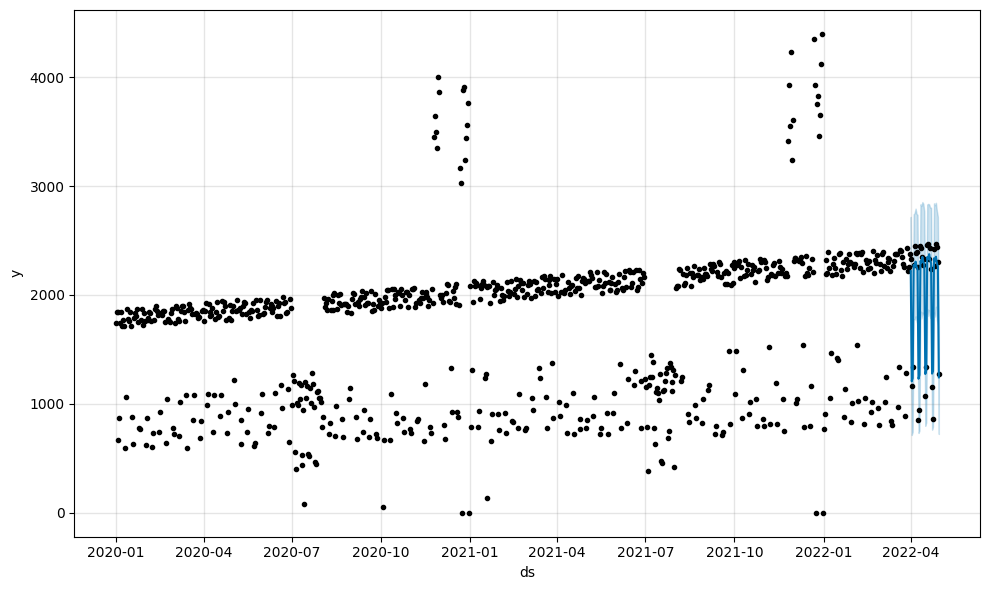

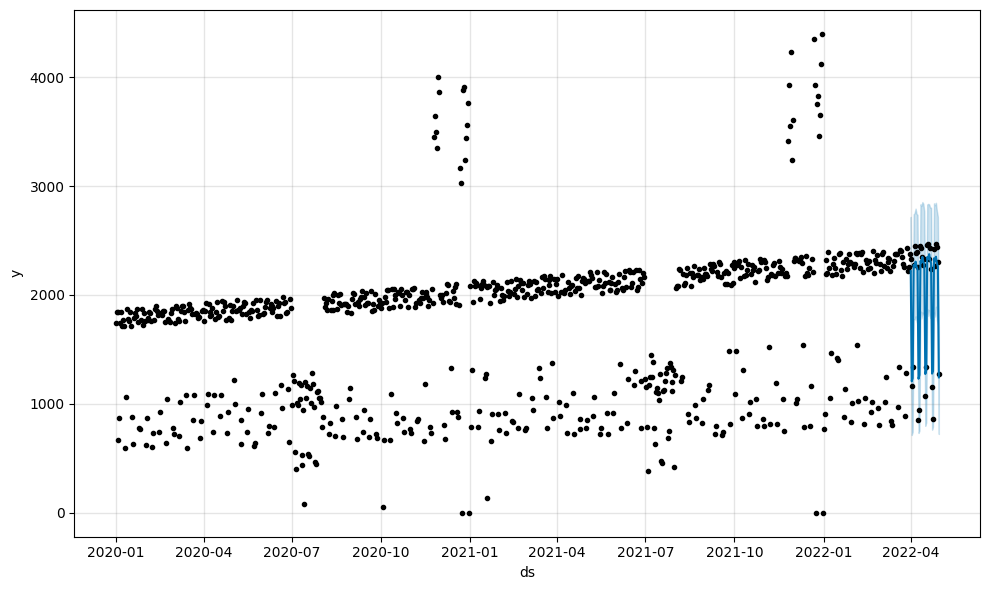

In [50]:
test_model.plot(test_forecast)

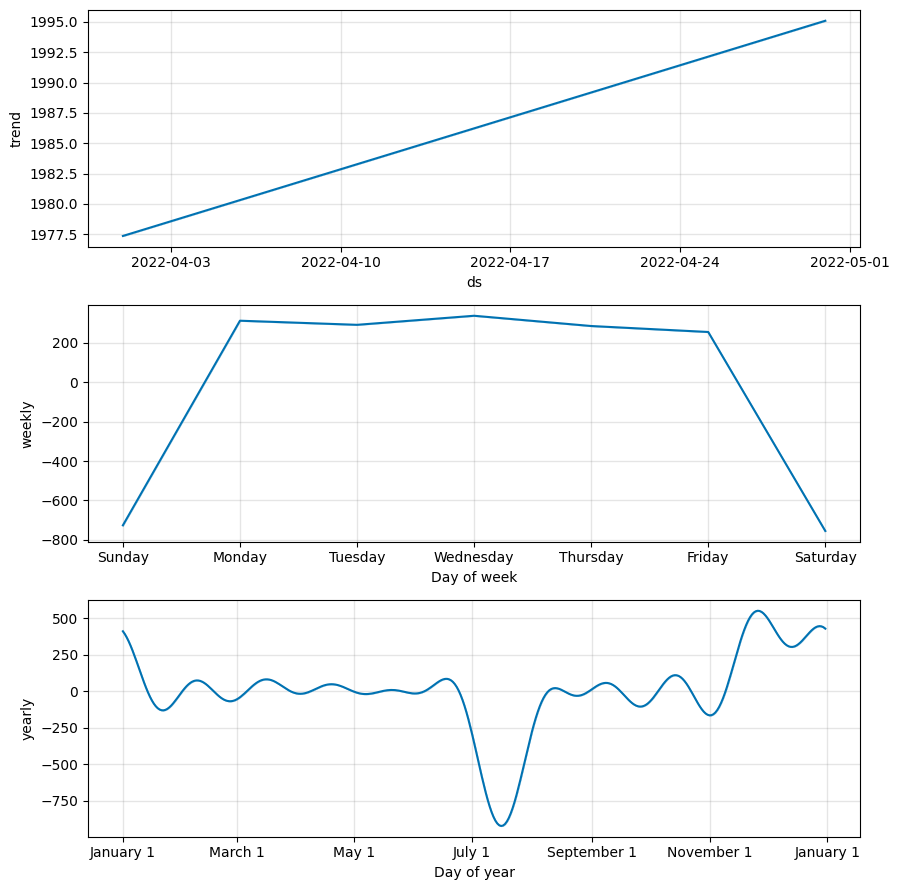

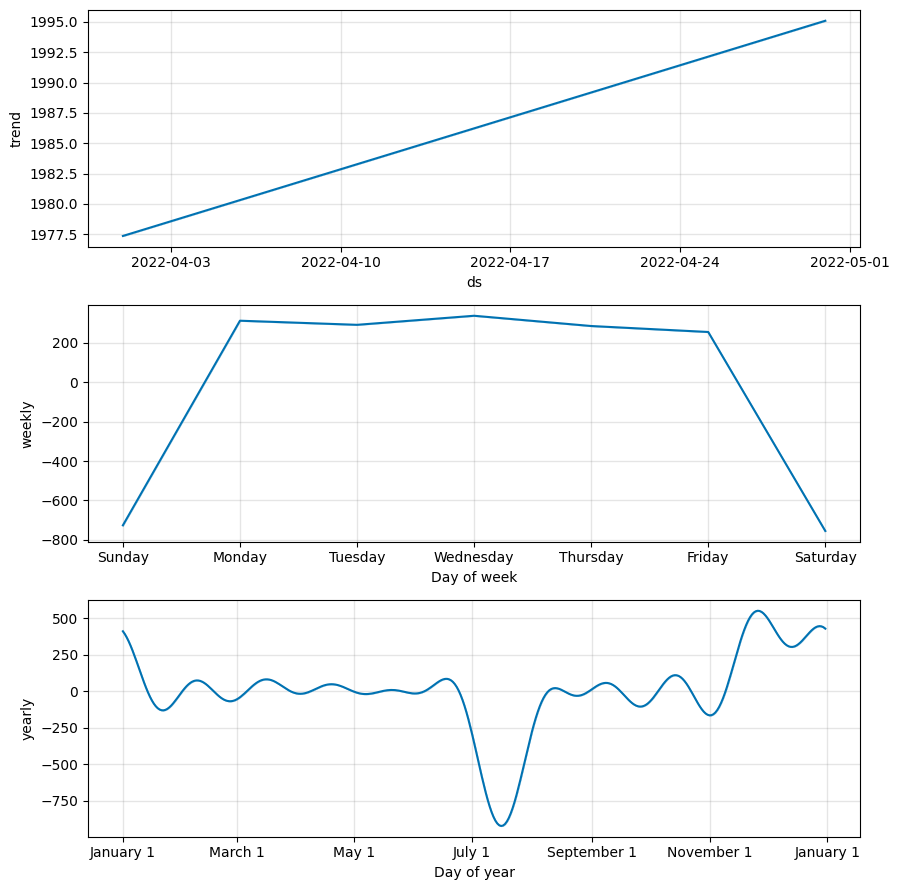

In [51]:
test_model.plot_components(test_forecast)

*Kör modellen mot testdatan och se om den presterar bättre än planeringen på 2000
paket om dagen*

In [52]:
mae = mean_absolute_error(y_true = test_data['y'], y_pred = test_forecast['yhat'])

In [53]:
mae

114.94322878729217

In [54]:
future = test_model.make_future_dataframe(periods=91)
future = future[future['ds']>='2022-06-01']
future
test_model.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-01,2014.655338,1809.796814,2812.153319,2014.655338,2014.655338,323.092875,323.092875,323.092875,337.365227,337.365227,337.365227,-14.272352,-14.272352,-14.272352,0.0,0.0,0.0,2337.748213
1,2022-06-02,2015.266718,1782.393838,2803.435811,2015.266718,2015.266718,270.959472,270.959472,270.959472,285.298466,285.298466,285.298466,-14.338993,-14.338993,-14.338993,0.0,0.0,0.0,2286.226190
2,2022-06-03,2015.878098,1745.641889,2751.052413,2015.878098,2015.878098,241.724914,241.724914,241.724914,254.980208,254.980208,254.980208,-13.255294,-13.255294,-13.255294,0.0,0.0,0.0,2257.603012
3,2022-06-04,2016.489478,769.087040,1767.714348,2016.489478,2016.489478,-765.895499,-765.895499,-765.895499,-754.985854,-754.985854,-754.985854,-10.909645,-10.909645,-10.909645,0.0,0.0,0.0,1250.593979
4,2022-06-05,2017.100858,780.135538,1754.903808,2017.100858,2017.100858,-733.537095,-733.537095,-733.537095,-726.300300,-726.300300,-726.300300,-7.236795,-7.236795,-7.236795,0.0,0.0,0.0,1283.563763
5,2022-06-06,2017.712238,1812.441885,2785.629634,2017.712238,2017.712238,310.037462,310.037462,310.037462,312.261987,312.261987,312.261987,-2.224525,-2.224525,-2.224525,0.0,0.0,0.0,2327.749700
6,2022-06-07,2018.323618,1834.644735,2847.325108,2018.323618,2018.323618,295.461358,295.461358,295.461358,291.380266,291.380266,291.380266,4.081092,4.081092,4.081092,0.0,0.0,0.0,2313.784977
7,2022-06-08,2018.934998,1850.626962,2872.877534,2018.934964,2018.935023,348.937290,348.937290,348.937290,337.365227,337.365227,337.365227,11.572063,11.572063,11.572063,0.0,0.0,0.0,2367.872288
8,2022-06-09,2019.546378,1854.868640,2802.189717,2019.546208,2019.546537,305.375156,305.375156,305.375156,285.298466,285.298466,285.298466,20.076690,20.076690,20.076690,0.0,0.0,0.0,2324.921535
9,2022-06-10,2020.157759,1805.001512,2789.922818,2020.157452,2020.158113,284.339962,284.339962,284.339962,254.980208,254.980208,254.980208,29.359754,29.359754,29.359754,0.0,0.0,0.0,2304.497720


<Axes: >

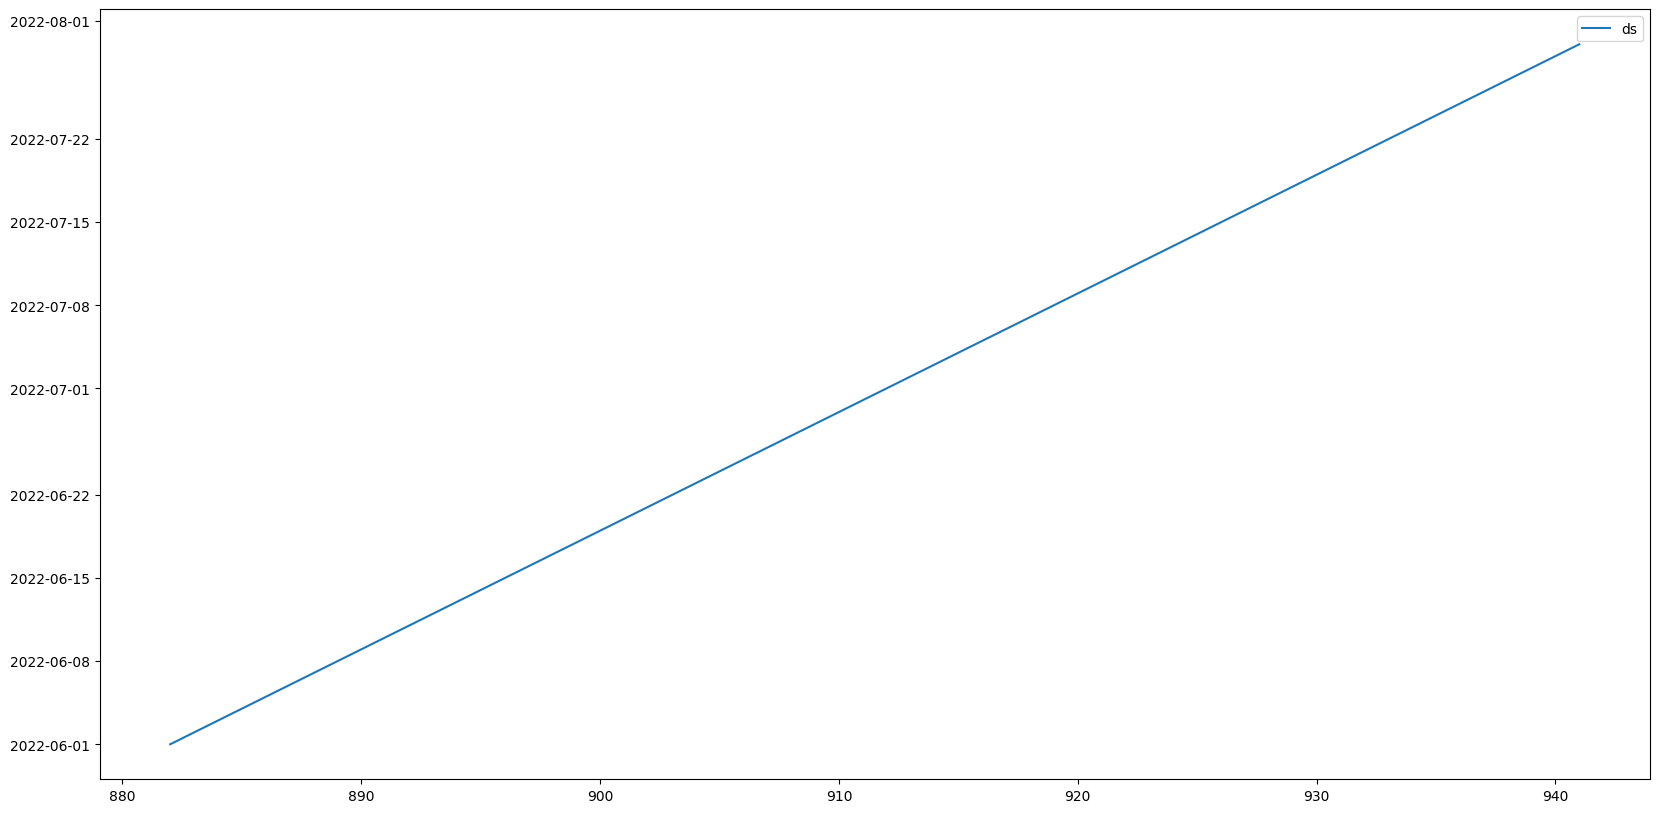

In [55]:
future.plot()

In [56]:
prediction = test_model.predict(future)

In [57]:
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-01,2014.655338,1820.049905,2847.954614,2014.655338,2014.655338,323.092875,323.092875,323.092875,337.365227,337.365227,337.365227,-14.272352,-14.272352,-14.272352,0.0,0.0,0.0,2337.748213
1,2022-06-02,2015.266718,1820.281830,2800.567960,2015.266718,2015.266718,270.959472,270.959472,270.959472,285.298466,285.298466,285.298466,-14.338993,-14.338993,-14.338993,0.0,0.0,0.0,2286.226190
2,2022-06-03,2015.878098,1792.753147,2777.079022,2015.878098,2015.878098,241.724914,241.724914,241.724914,254.980208,254.980208,254.980208,-13.255294,-13.255294,-13.255294,0.0,0.0,0.0,2257.603012
3,2022-06-04,2016.489478,746.377208,1719.731147,2016.489478,2016.489478,-765.895499,-765.895499,-765.895499,-754.985854,-754.985854,-754.985854,-10.909645,-10.909645,-10.909645,0.0,0.0,0.0,1250.593979
4,2022-06-05,2017.100858,774.704414,1774.749363,2017.100858,2017.100858,-733.537095,-733.537095,-733.537095,-726.300300,-726.300300,-726.300300,-7.236795,-7.236795,-7.236795,0.0,0.0,0.0,1283.563763
5,2022-06-06,2017.712238,1856.540708,2861.998822,2017.712238,2017.712238,310.037462,310.037462,310.037462,312.261987,312.261987,312.261987,-2.224525,-2.224525,-2.224525,0.0,0.0,0.0,2327.749700
6,2022-06-07,2018.323618,1780.656406,2820.468629,2018.323605,2018.323618,295.461358,295.461358,295.461358,291.380266,291.380266,291.380266,4.081092,4.081092,4.081092,0.0,0.0,0.0,2313.784977
7,2022-06-08,2018.934998,1867.048273,2840.302017,2018.934853,2018.935105,348.937290,348.937290,348.937290,337.365227,337.365227,337.365227,11.572063,11.572063,11.572063,0.0,0.0,0.0,2367.872288
8,2022-06-09,2019.546378,1810.636046,2820.451353,2019.546084,2019.546620,305.375156,305.375156,305.375156,285.298466,285.298466,285.298466,20.076690,20.076690,20.076690,0.0,0.0,0.0,2324.921535
9,2022-06-10,2020.157759,1800.536014,2780.515274,2020.157246,2020.158151,284.339962,284.339962,284.339962,254.980208,254.980208,254.980208,29.359754,29.359754,29.359754,0.0,0.0,0.0,2304.497720


C:\Users\nille\AppData\Local\Temp\ipykernel_11116\3076089293.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


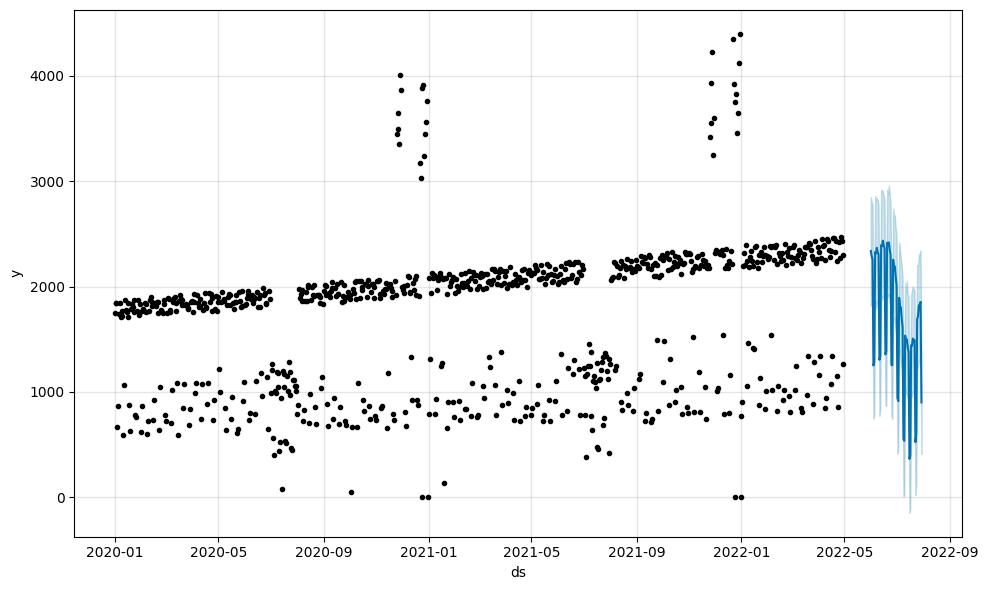

In [58]:
fig = test_model.plot(prediction)
fig.show()

In [77]:
dataset = pd.DataFrame({'value': [2000] * 30})
test_forecast = test_forecast[test_forecast['ds'] >= '2022-04-01']

print(f"MAE original planning: {mean_absolute_error(dataset['value'],test_data['y'])}")
print(f"MAE's model prediction: {mean_absolute_error(test_data['y'],test_forecast['yhat'])}")

MAE original planning: 524.9666666666667
MAE's model prediction: 114.94322878729217
